# Assignment #3

# 1. K-means from scratch (50 points)

Code up the K-means algorithm. To test your code, sample from the three bivariate Gaussian distributions provided below and find three clusters from this sampled data. To initialize your algorihtm, you may use the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot similar to the one shown below. For consistency, set the random seed to 1 before sampling from the three bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
3.0\\
1.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-1.0\\
3.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \mathbf{\Sigma_3}\begin{bmatrix}
0.9&0.3\\
0.3&0.9\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
-2.0\\
2.0\\
\end{bmatrix}$$

In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# setting seed for reproducability
np.random.seed(1)

# defining the means
mu1 = np.array([3.0, 1.0])
mu2 = np.array([-1.0, 3.0])
mu3 = np.array([-5.0, 2.0])

# defining the shared covariance matrix
sigma = np.array([[0.9, 0.3],
                 [0.3, 0.9]])

# sampling the data from the three Gaussian distributions
# n = 100 points from each distribution which is a total of 300 points
n = 100
X1 = np.random.multivariate_normal(mu1, sigma, n)
X2 = np.random.multivariate_normal(mu2, sigma, n)
X3 = np.random.multivariate_normal(mu3, sigma, n)

# stacking all the samples into one dataset
X = np.vstack((X1, X2, X3))

In [2]:
# initializing the centroids as specified above
C = np.array([
    [0.4, 0.3],
    [0.1, 0.4],
    [-2.0, 2.0]
])

In [3]:
def assign_clusters(X, centroids):
    """
    Assignment step: Assign each point to the nearest centroid
    
    Parameters:
    X: array of shape (n_samples, n_features) - the data points
    centroids: array of shape (k, n_features) - the current centroids
    
    Returns:
    labels: array of shape (n_samples,) - cluster assignment of each point
    """
    # calculate the Euclidean distance from each point to each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis = 2)
    # returns the index of the closest centroid for each point
    return np.argmin(distances, axis =1)

def update_centroids(X, labels, k):
    """
    Update step: Recalculate centroids as the mean of all points assigned to each cluster.
    
    Parameters:
    X: array of shape (n_samples, n_features) - the data points
    labels: array of shape (n_samples,) - current cluster assignments
    k: int - number of clusters
    
    Returns:
    new_centroids: array of shape (k, n_features) - updated centroid positions
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis = 0)
    return new_centroids

def has_converged(old_centroids, new_centroids, tol = 1e-4):
    """
    Checks if the algorithm has converged by comparing centroid movement.
    
    Parameters:
    old_centroids: array of shape (k, n_features) - previous centroid positions
    new_centroids: array of shape (k, n_features) - current centroid positions
    tol: float - tolerance threshold for convergence (default: 1e-4)
    
    Returns:
    bool: True if centroids have moved less than tolerance, False otherwise
    """
    return np.linalg.norm(old_centroids - new_centroids) < tol

In [4]:
# main loop of the K-means algorithm
k = 3 # number of clusters
centroids = C.copy() # initializing the starting centroids

for iteration in range(100):
    # assigning each point to the nearest centroid
    labels = assign_clusters(X, centroids)
    
    # updating the centroids to mean to assigned points
    new_centroids = update_centroids(X, labels, k)
    
    # printing the iteration information
    print(f"Iteration {iteration}:")
    print(new_centroids, "\n")
    
    # check for convergence
    if has_converged(centroids, new_centroids):
        print(f"Converged after {iteration} iterations.")
        break
    
    # updating centroids for the next iteration
    centroids = new_centroids

Iteration 0:
[[ 2.81286339  0.87268239]
 [ 0.2915155   2.07546533]
 [-3.14413669  2.5850506 ]] 

Iteration 1:
[[ 2.89837954  0.79451839]
 [-0.36682518  3.14720995]
 [-4.28335956  2.26587862]] 

Iteration 2:
[[ 2.83170601  0.81716089]
 [-0.87627174  3.18373802]
 [-5.00233169  2.04908253]] 

Iteration 3:
[[ 2.83170601  0.81716089]
 [-0.99113224  3.12038074]
 [-5.17750158  2.033979  ]] 

Iteration 4:
[[ 2.824456    0.84653064]
 [-1.02173212  3.11381515]
 [-5.17750158  2.033979  ]] 

Iteration 5:
[[ 2.824456    0.84653064]
 [-1.02173212  3.11381515]
 [-5.17750158  2.033979  ]] 

Converged after 5 iterations.


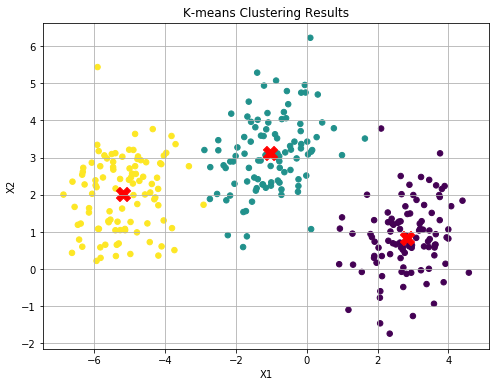

In [5]:
# visualization 1: K-means clustering results
# this chart shows the predicted cluster assignments with the final centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X')
plt.title('K-means Clustering Results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


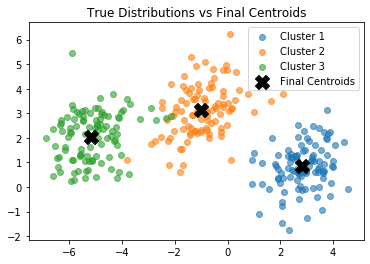

In [6]:
# visualization 2: true distributions vs final centroids
# shows the original cluster memberships for comparison
plt.scatter(X1[:,0], X1[:,1], label='Cluster 1', alpha=0.6)
plt.scatter(X2[:,0], X2[:,1], label='Cluster 2', alpha=0.6)
plt.scatter(X3[:,0], X3[:,1], label='Cluster 3', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Final Centroids')
plt.legend()
plt.title('True Distributions vs Final Centroids')
plt.show()

> The K-means algorithm converged after five iterations, indicating stable centroid positions and well-defined stuctures. The final centroids were approximately located at:
> $$\mathbf{\mu_1} = \begin{bmatrix}
2.82\\
0.85\\
\end{bmatrix}$$
>
> $$\mathbf{\mu_2} = \begin{bmatrix}
-1.02\\
3.11\\
\end{bmatrix}$$
>
> $$\mathbf{\mu_3} = \begin{bmatrix}
-5.18\\
2.03\\
\end{bmatrix}$$
>
> As shown in the clustering plot, the algorithm successfully partitioned the data into three distinct groups that align closely with the true Gaussian distributions.
>
> The centroids are centered within each dense region, demonstrating that K-means correctly recovered the underlying structure of the data.
>
> Comparing the predicted clusters to the true distributions shows that K-means successfully recovered the underlying cluster structure. This performance is expected given that the three Gaussian distributions are well-separated in feature space with minimal overlap between clusters.

# 2. Predicting soil taxonomy (50 pts)

In the United States, soils are classified using the [USDA soil taxonomy](https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_051232.pdf). Within the USDA soil taxonomy, the most general level is the taxonomic order. In this problem we will be using a suite of decision-tree based classification algorithms to create spatial maps of taxonomic order over western Illinois. The point observations come from the [NASIS database](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/tools/?cid=nrcs142p2_053552) while the environmental predictors come from Sentinel 2, the National Elevation Data, and the National Land Cover database.

All the data has already been subsetted and preprocessed and are compiled in the following NetCDF file `/data/HW/HW3.nc`. The file is split into two groups: predictors and observations. The predictors group contains a set of 1 arcsec maps for the domain and the observations group contains the in-situ taxonomic order observations with their associated geographic coordinates. Although not required, we recommend using xarray to read in these data. 

**A.** Read in and create maps of all the predictors. Describe any apparent discrepancies in spatial resolution between the maps.

**B.** Read in the in-situ observations and assemble the corresponding predictors for each site. Create the $\mathbf{X}$ array of predictors and the $\mathbf{y}$ array of observed taxonomic orders. Note that you will need to convert the taxonomic order names to integers.

**C.** Use the validation set approach to divide your data into training and test datasets. The training dataset should 20% of the data. Then fit a Decision tree using the training data and evaluate its accuracy for both the training and test datasets. Explain the differences in accuracy when evaluating the training and test datasets. To ensure reproduceability, when initializing the decision tree, set the random_state to 1.

**D.** Using  all the site data, perform a 10-fold cross validation of the decision tree and compare the results to the previous exercise. Set random_state to 1 and set shuffle to True.

**E.** Setting the number of decision trees to 100, perform a 10-fold cross validation using Bagging, Random Forests, Gradient Boosting, and Multilayer Perceptrons (ANNs). Discuss how the results of these different ensemble methods vary amongst themselves. Also compare the results to those obtained from a single decision tree. Remember to set random_state to 1.

**F.** Using 100 trees, fit a Random Forest to the entire sites dataset and report the out of bag score. Compare that result to that obtained from the cross validation. Explain what the out of bag score is and how it can be more useful than cross validation. Remember to set random_state to 1.

**G.** Starting from 10 to 100 decision trees per Random Forest, determine the optimal number of decision trees. 

**H.** After fitting a random forest with 100 trees, plot a map of the entire region of the predicted taxonomy order.

**I.** Use Principal Component Analysis (PCA) to determine a reduced number of covariates. The exact number of features that you use from PCA is not as important as much as explaining why you use the result that you use. Fit and evaluate the Random Forest fit from the corresponding principal components.

In [7]:
# importing the required libraries
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", message="Some inputs do not have OOB scores.")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### **A.**

In [8]:
# Part A
# opening the dataset
ds = xr.open_dataset("/data/HW/HW3.nc", decode_times = False, group = None)

# looking at what's inside
print(ds)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*


In [9]:
# being specific about the libraries we are opening
preds = xr.open_dataset("/data/HW/HW3.nc", group = "predictors")
obs = xr.open_dataset("/data/HW/HW3.nc", group = "observations")

print(preds)

<xarray.Dataset>
Dimensions:              (lat: 1080, lon: 1080)
Coordinates:
  * lat                  (lat) float64 39.85 39.85 39.85 ... 40.15 40.15 40.15
  * lon                  (lon) float64 -90.65 -90.65 -90.65 ... -90.35 -90.35
Data variables:
    elevation            (lat, lon) float32 ...
    ndvi                 (lat, lon) float32 ...
    evi                  (lat, lon) float32 ...
    red                  (lat, lon) float32 ...
    green                (lat, lon) float32 ...
    blue                 (lat, lon) float32 ...
    tree_cover_fraction  (lat, lon) float32 ...
    gamma_uranium        (lat, lon) float32 ...
    gamma_thorium        (lat, lon) float32 ...
    gamma_potassium      (lat, lon) float32 ...


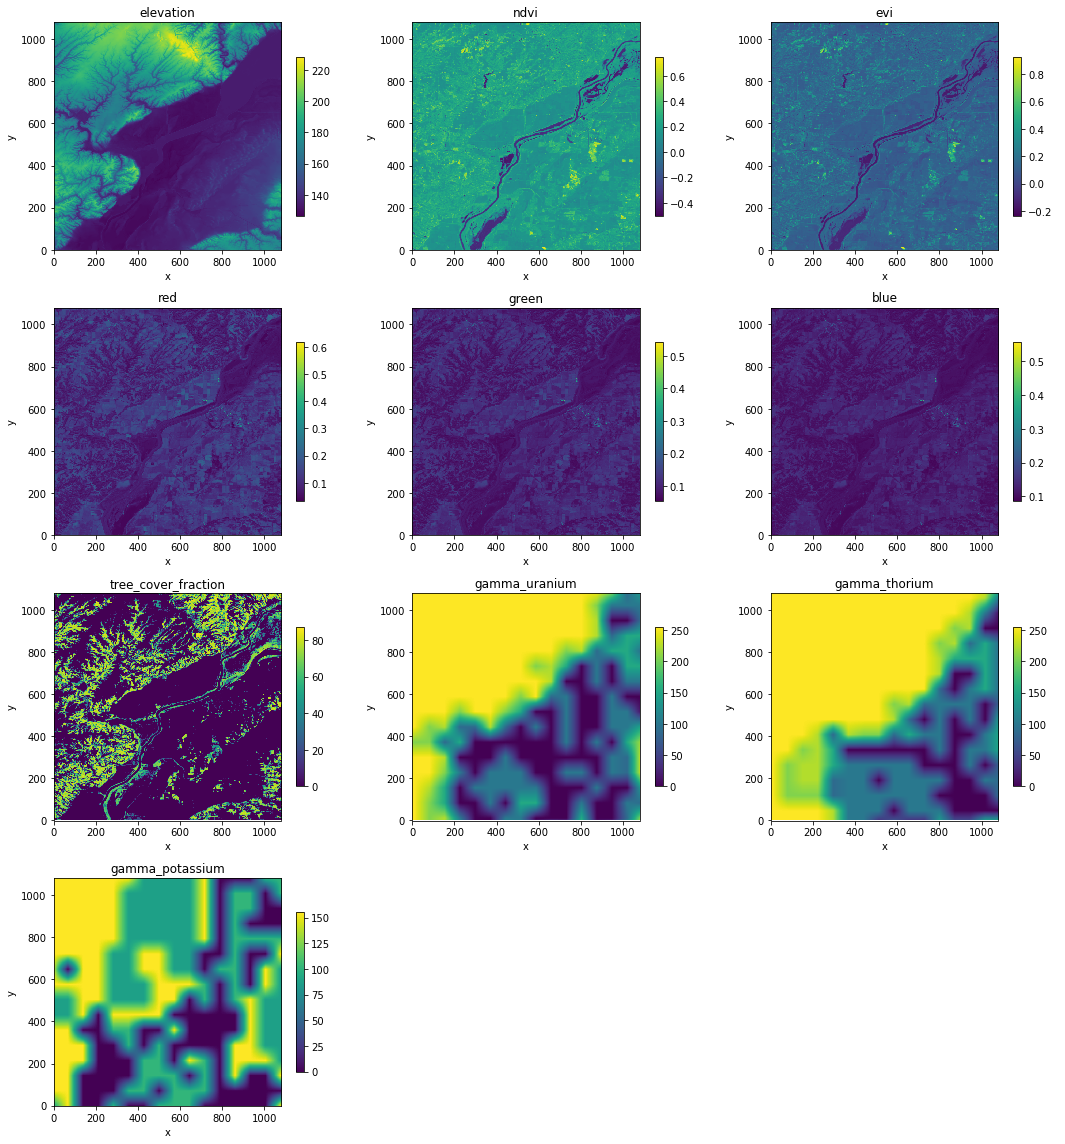

In [10]:
# plotting all the rasters to inspect spatial coverage and resolution

# making a list of the variables to plot
vars_to_plot = list(preds.data_vars)

n_vars = len(vars_to_plot)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*n_cols, 4*n_rows))
axes = axes.ravel()

for i, var in enumerate(vars_to_plot):
    da = preds[var]
    
    im = axes[i].imshow(
        da.squeeze(),
        origin = "lower",
        cmap = "viridis"
    )
    axes[i].set_title(var)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    fig.colorbar(im, ax = axes[i], shrink = 0.7)
    
# hiding any leftover empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")
    
plt.tight_layout()
plt.show()

> The predictor maps reveal clear differences in spatial resolution:
> * ```elevation```, ```ndvi```, ```evi``` and Sentinel-2 spectral bands ```red```, ```green```, ```blue``` display fine spatial detail.
> * The ```tree_cover_fraction``` map also appear relatively detailed, showing fine-scale vegetation structure.
> * In contrast, the gamma-ray variables ```gamma_uranium```, ```gamma_thorium``` and ```gamma_potassium``` look much coarser and blockier. Each pixel represents a larger sampling footprint which produces abrupt, patchy transitions.

In [11]:
print(obs)

<xarray.Dataset>
Dimensions:          (site: 153)
Dimensions without coordinates: site
Data variables:
    lat              (site) float64 ...
    lon              (site) float64 ...
    taxonomic_order  (site) object ...


### **B.**

In [12]:
# Part B

# converting the point data to a Dataframe
obs_df = obs.to_dataframe().reset_index()

# making sure lat/lon column names match what preds uses
lat_name = 'lat' if 'lat' in preds.coords else 'y'
lon_name = 'lon' if 'lon' in preds.coords else 'x'

# extracting the predictor values at each point
X_list = []
for var in preds.data_vars:
    sampled = preds[var].interp(
    {lat_name: xr.DataArray(obs_df['lat'], dims = 'z'),
    lon_name: xr.DataArray(obs_df['lon'], dims = 'z')},
    method = 'nearest').values
    X_list.append(sampled)
    
# combine into a DataFrame
X = pd.DataFrame({var: col for var, col in zip(preds.data_vars, X_list)})

# defining the target variable - soil order
y = obs_df['taxonomic_order']

In [13]:
# encoding the categorical variables into numeric classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(le.classes_)

['alfisols' 'entisols' 'inceptisols' 'mollisols']


In [14]:
print(X.shape)

# checking if the encoding has been done correctly
print(pd.DataFrame({'y_original': y, 'y_encoded': y_encoded}).head())

(153, 10)
  y_original  y_encoded
0  mollisols          3
1  mollisols          3
2  mollisols          3
3  mollisols          3
4   entisols          1


In [15]:
"""
X might contain some missing values because some observation points fall outside the predictor rasters coverage
The Decision Tree cannot handle NaNs by default
"""

# combine X and y into one dataframe for easy cleaning
data = X.copy()
data["y"] = y_encoded

# drop any rows with NaN or inf
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# separate back into predictors and target
X_clean = data.drop(columns="y")
y_clean = data["y"]

print("Shape before:", X.shape)
print("Shape after cleaning:", X_clean.shape)

Shape before: (153, 10)
Shape after cleaning: (152, 10)


### **C.**

In [16]:
# Part C

# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, train_size = 0.2, random_state = 1)

print(X_train.shape, X_test.shape)

(30, 10) (122, 10)


In [17]:
# fitting the decision tree
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [18]:
# evaluating the performance
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy: {acc_train:.3f}")
print(f"Test accuracy: {acc_test:.3f}")

Training accuracy: 1.000
Test accuracy: 0.574


> The decision-tree classifier achieved 100% accuracy on the training data but only 57% on the test data. This large gap indicates overfitting. The tree learned highly specific patterns from the training subset that do not generalize to unseen observations. As individual decision trees are high-variance models, their predictive performance on out-of-sample data is unstable.

### **D.**

In [19]:
# Part D

# defining the same model as before
tree = DecisionTreeClassifier(random_state = 1)

# 10-fold CV with shuffling
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
scores = cross_val_score(tree, X_clean, y_clean, cv = kf)

print("Accuracy socres for each fold:", np.round(scores, 3))
print("Mean CV accuracy:", np.mean(scores).round(3))
print("Standard deviation:", np.std(scores).round(3))

Accuracy socres for each fold: [0.625 0.562 0.8   0.667 0.8   0.4   0.733 0.4   0.8   0.667]
Mean CV accuracy: 0.645
Standard deviation: 0.144


> A 10-fold cross-validation was perfomed using the same decision-tree classifier. The mean CV accuracy was approximately 64.5% which is slightly higher than the single train-test accuracy from the validation-set approach. The large spread among the folds indicates high variance and limited generalization capacity of a single tree, reinforcing the need for ensemble methods that average multiple trees to stabilize predictions and reduce variance.

### **E.**

In [20]:
# Part E

# defining the models
models = {
    "Bagging": BaggingClassifier(n_estimators= 100, random_state = 1),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 100, random_state = 1),
    "MLP": MLPClassifier(hidden_layer_sizes = (100,), max_iter = 1000, random_state = 1)
}

In [21]:
# running the 10-fold CV
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

# evaluating each model via the 10-fold Cv
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_clean, y_clean, cv = kf)
    results[name] = (np.mean(scores), np.std(scores))
    print(f"{name} Mean Accuracy = {np.mean(scores):.3f} | SD = {np.std(scores):.3f}")

Bagging Mean Accuracy = 0.717 | SD = 0.151
Random Forest Mean Accuracy = 0.770 | SD = 0.087
Gradient Boosting Mean Accuracy = 0.764 | SD = 0.161
MLP Mean Accuracy = 0.617 | SD = 0.109


> While the ensemble methods generally reduced the variance in model predictions, the fold-to-fold standard deviations for Bagging and Gradient Boosting were slightly larger than for the single decision tree. This reflects variability in cross-validation sampling rather than the intrinsic failure to stabilize predictions. Despite the larger SD, the mean accuracy increased markedly, confirming improved generalization. Random Forest provided the most stable performance overall with a standard deviation of 8.7%. 

### **F.**

In [22]:
# Part F

rf_oob = RandomForestClassifier(
    n_estimators = 100,
    oob_score = True,
    random_state = 1
)

rf_oob.fit(X_clean, y_clean)

print(f"OOB accuracy: {rf_oob.oob_score_:.3f}")

OOB accuracy: 0.743


> Each tree in a Random Forest is trained on a bootstrap sample of the training data. On average, about 63% of observations are used to train each tree, leaving the remaining 37% as out-of-bag data. Those OOB samples act like a built-in validation set. After all the trees are trained, each observation's predicted class is aggregated only from trees that did not see it during training. The fraction of correctly predicted OOB observations is reported as the OOB score.

> A Random Forest with 100 trees and ```oob_score = True``` produced an OOB accuracy of 74.3%, closely matching the 10-fold cross-validation result of 77%. The similarity between these two estimates indicates that the Random Forest is performing consistently and not overfitting. The OOB score is particularly covenient because it provides an unbiased internal estimate of model performance without needing to performance separate cross-validation, thereby reducing computational cost while preserving accuracy.

### **G.**

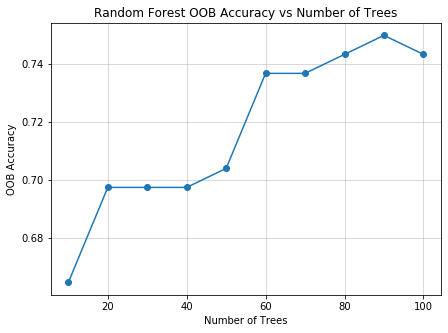

Optimal number of trees = 90, OOB accuracy = 0.750


In [23]:
# Part G

n_trees = np.arange(10, 110, 10)
oob_scores = []

for n in n_trees:
    rf = RandomForestClassifier(
        n_estimators =n,
        oob_score = True,
        random_state = 1
    )
    rf.fit(X_clean, y_clean)
    oob_scores.append(rf.oob_score_)
    
# plotting the OOB accuracy vs number of trees
plt.figure(figsize = (7, 5))
plt.plot(n_trees, oob_scores, marker = 'o')
plt.title("Random Forest OOB Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Accuracy")
plt.grid(True, alpha = 0.6)
plt.show()

# finding the optimal number of trees
best_n = n_trees[np.argmax(oob_scores)]
print(f"Optimal number of trees = {best_n}, OOB accuracy = {max(oob_scores):.3f}")

> We tested Random Forest models with 10 to 100 trees and evaluated their out-of-bag accuracy. Accuracy increased sharply up to roughly 60 trees and then plateaued near 0.75.
> The model reached its optimal trade-off between bias and variance around 90 trees. Adding more trees only increased computational cost without meaningful improvement. Therefore, an optimal range of 80-90 trees provides stable, high accuracy for predicting soil taxonomic order across the study region.

### **H.**

In [24]:
# Part H

# making sure the predictors are in the same order as used for training
features = list(X_clean.columns)

# flattening each raster into a 1D vector
stacked = np.column_stack([preds[var].values.ravel() for var in features])

# handling NaNs
mask = ~np.any(np.isnan(stacked), axis = 1)
X_pred = stacked[mask]

In [25]:
# using the trained Random Forest
rf = RandomForestClassifier(n_estimators = 90, random_state = 1)
rf.fit(X_clean, y_clean)

y_pred_flat = np.full(mask.shape, np.nan)
y_pred_flat[mask] = rf.predict(X_pred)

# reshaping back to map shape
ny, nx = preds[features[0]].shape
y_pred_map = y_pred_flat.reshape(ny, nx)

In [26]:
print(preds.coords)

Coordinates:
  * lat      (lat) float64 39.85 39.85 39.85 39.85 ... 40.15 40.15 40.15 40.15
  * lon      (lon) float64 -90.65 -90.65 -90.65 -90.65 ... -90.35 -90.35 -90.35


In [27]:
# converting to an xarray Dataset for plotting
pred_map = xr.DataArray(
    y_pred_map,
    dims = ('lat', 'lon'),
    coords = {'lat': preds['lat'], 'lon': preds['lon']},
    name = 'predicted_soil_order')

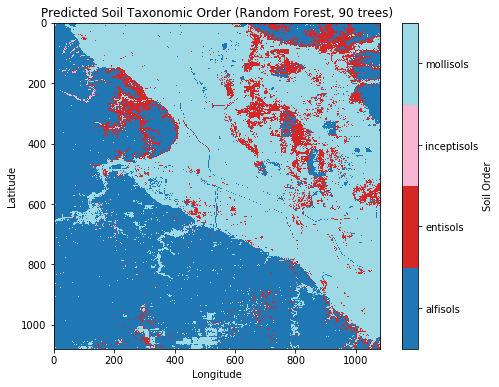

In [28]:
# plotting the predicted map

classes = le.classes_
n_classes = len(classes)

cmap = plt.cm.get_cmap('tab20', n_classes)
norm = mcolors.BoundaryNorm(np.arange(-0.5, n_classes + 0.5, 1), cmap.N)

plt.figure(figsize=(8,6))
im = plt.imshow(y_pred_map, cmap = cmap, norm = norm)
plt.title("Predicted Soil Taxonomic Order (Random Forest, 90 trees)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

cbar = plt.colorbar(im, ticks = np.arange(n_classes))
cbar.ax.set_yticklabels(classes)
cbar.set_label("Soil Order")

plt.show()

> The Random Forest model with 90 trees was applied to the full predictor grid to generate spatial predictions of soil taxonomic order. The resulting map shows clear regional variation in predicted soil orders.
> Mollisols dominate the central portion of the map, coinciding with low-relief agricultural plains.
> Entisols and Inceptisols appear along the river valleys and floodplains, reflecting younger soils formed in recent alluvial deposits.
> Alfisols occur primarily on upland trees, associated with more developed horizons and better drainage.
> The spatial organization is consistent with well known pedologic relationships between soil type, topography, and vegetation cover.

### **I.**

In [29]:
# Part I

# standardizing the predictors for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# computing the explained variance to decide the number of components
pca = PCA()
pca.fit(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)

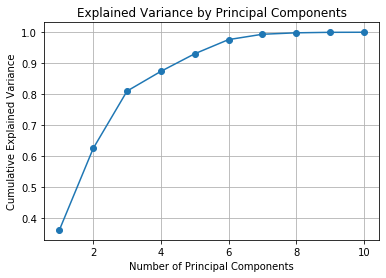

In [30]:
# plotting the graph to show the explained variance by the principal components
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()

In [31]:
# keeping enough principal components such that approx 90% of the variance is explained
n_components = np.argmax(explained >= 0.90) + 1
print(f"Using {n_components} components (≈90% variance explained)")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Using 5 components (≈90% variance explained)


In [32]:
# re-evaluating the random forest using PCA features
rf_pca = RandomForestClassifier(n_estimators=90, random_state=1)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

scores_pca = cross_val_score(rf_pca, X_pca, y_clean, cv=kf)
print(f"Mean CV Accuracy (PCA features): {np.mean(scores_pca):.3f}")
print(f"Std Dev: {np.std(scores_pca):.3f}")

Mean CV Accuracy (PCA features): 0.710
Std Dev: 0.143


> PCA successfully reduced the 9 predictor variables to 5 principal components while retaining about 90% of the original variance. When a Random Forest was trained on these components, the mean 10-fold cross-validation accuracy was 71% compared to 77% for the full predictor set. The decline in accuracy reflects minor information loss from dimensionality reduction, but it also simplifies the model and reduces redundancy among correlated predictors.
> The result demonstrates that most of the environmental variability influencing soil taxonomy can be summarized by a handful of orthogonal gradients. In practical terms, PCA helps identify which combinations of topographic, spectral and geochemical factors dominate soil-order differentiation, while enabling faster, more interpretable modeling.